In [1]:
import pandas as pd
import numpy as np



In [2]:
# A: random floating point value
A = np.random.rand(6)

# B: randomly assigned categorical values from ["test", "train"]
B = np.random.choice(["test", "train"], size=6)

# C: random integer values, constructed from an numpy.array
C = np.random.randint(1, 100, size=6)

# D: random integer values, constructed from a Series
D = pd.Series(np.random.randint(50, 150, size=6))

# E: monthly dates "2021-01-01", "2021-02-01", "2021-03-01" ...
E = pd.date_range("2021-01-01", periods=6, freq="MS")


In [3]:
# Construct Data Frame
df = pd.DataFrame({
    "A": A,
    "B": B,
    "C": C,
    "D": D,
    "E": E
})


In [4]:
print(df)


          A      B   C    D          E
0  0.186893  train  42  145 2021-01-01
1  0.390564   test  81  135 2021-02-01
2  0.326704   test  45  146 2021-03-01
3  0.619003  train  82   50 2021-04-01
4  0.409020  train  70  148 2021-05-01
5  0.476191   test  17   59 2021-06-01


In [5]:
# Only include numerical rows
numeric_cols = df[["A", "C", "D"]]

# Convert to numpy matrix
numeric_matrix = numeric_cols.to_numpy()

# Calculate row sum
row_sums = numeric_matrix.sum(axis=1)

# Result
print("Numeric matrix:")
print(numeric_matrix)

print("\nRow sums:")
print(row_sums)

Numeric matrix:
[[  0.18689287  42.         145.        ]
 [  0.39056406  81.         135.        ]
 [  0.32670374  45.         146.        ]
 [  0.61900346  82.          50.        ]
 [  0.40901974  70.         148.        ]
 [  0.47619109  17.          59.        ]]

Row sums:
[187.18689287 216.39056406 191.32670374 132.61900346 218.40901974
  76.47619109]


In [6]:
# Sort accodring to C
df_sorted = df.sort_values(by="C")

# Result
print(df_sorted)


          A      B   C    D          E
5  0.476191   test  17   59 2021-06-01
0  0.186893  train  42  145 2021-01-01
2  0.326704   test  45  146 2021-03-01
4  0.409020  train  70  148 2021-05-01
1  0.390564   test  81  135 2021-02-01
3  0.619003  train  82   50 2021-04-01


In [7]:
# Criteria
df_filtered = df[(df["B"] == "train") & (df["C"] > 0)]

print(df_filtered)


          A      B   C    D          E
0  0.186893  train  42  145 2021-01-01
3  0.619003  train  82   50 2021-04-01
4  0.409020  train  70  148 2021-05-01


In [8]:
# Change the value in the 4th column and 2nd row to 10.
df.iloc[1, 3] = 10  


In [9]:
# Create a column F where half the values are NaN
F = [np.nan, np.nan, np.nan, 10, 15, 20]

# Add into df
df["F"] = F

# Result
print(df)

          A      B   C    D          E     F
0  0.186893  train  42  145 2021-01-01   NaN
1  0.390564   test  81   10 2021-02-01   NaN
2  0.326704   test  45  146 2021-03-01   NaN
3  0.619003  train  82   50 2021-04-01  10.0
4  0.409020  train  70  148 2021-05-01  15.0
5  0.476191   test  17   59 2021-06-01  20.0


In [10]:
# Drop NA
df_dropped = df.dropna()

print("After dropping rows with NaN values:")
print(df_dropped)


After dropping rows with NaN values:
          A      B   C    D          E     F
3  0.619003  train  82   50 2021-04-01  10.0
4  0.409020  train  70  148 2021-05-01  15.0
5  0.476191   test  17   59 2021-06-01  20.0


In [11]:
# Fill in 0 for NA
df_filled = df.fillna(0)

print("\nAfter filling NaN values with 0:")
print(df_filled)



After filling NaN values with 0:
          A      B   C    D          E     F
0  0.186893  train  42  145 2021-01-01   0.0
1  0.390564   test  81   10 2021-02-01   0.0
2  0.326704   test  45  146 2021-03-01   0.0
3  0.619003  train  82   50 2021-04-01  10.0
4  0.409020  train  70  148 2021-05-01  15.0
5  0.476191   test  17   59 2021-06-01  20.0


In [12]:
#Convert column A into a cumulative sum.
df["A_cumsum"] = df["A"].cumsum()

print(df)


          A      B   C    D          E     F  A_cumsum
0  0.186893  train  42  145 2021-01-01   NaN  0.186893
1  0.390564   test  81   10 2021-02-01   NaN  0.577457
2  0.326704   test  45  146 2021-03-01   NaN  0.904161
3  0.619003  train  82   50 2021-04-01  10.0  1.523164
4  0.409020  train  70  148 2021-05-01  15.0  1.932184
5  0.476191   test  17   59 2021-06-01  20.0  2.408375


In [13]:
# Convert B into number
df["B_num"] = df["B"].map({"train": 0, "test": 1})

# B-A
df["B_minus_A"] = df["B_num"] - df["A"]

print(df[["B", "A", "B_num", "B_minus_A"]])


       B         A  B_num  B_minus_A
0  train  0.186893      0  -0.186893
1   test  0.390564      1   0.609436
2   test  0.326704      1   0.673296
3  train  0.619003      0  -0.619003
4  train  0.409020      0  -0.409020
5   test  0.476191      1   0.523809


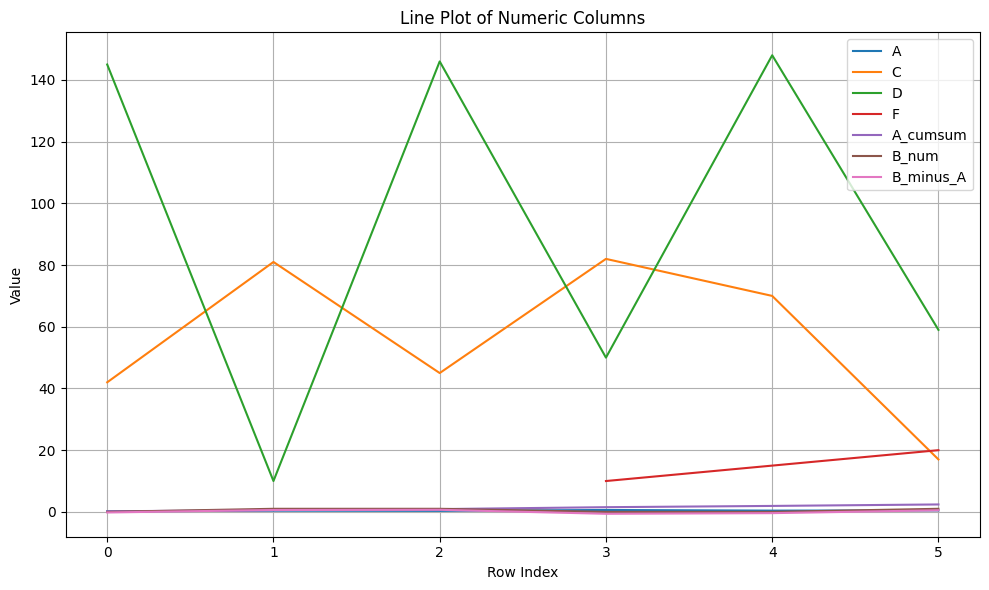

In [16]:
import matplotlib.pyplot as plt

# Select numerical rows
numeric_cols = df.select_dtypes(include=["number"])

# Plot line graph
plt.figure(figsize=(10, 6))
for col in numeric_cols.columns:
    plt.plot(numeric_cols.index, numeric_cols[col], label=col)

# Add axis and label
plt.xlabel("Row Index")
plt.ylabel("Value")
plt.title("Line Plot of Numeric Columns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Classified according to "B", and get the Mean
grouped_means = df.groupby("B").mean(numeric_only=True)

# Result
print(grouped_means)


              A          C           D     F  A_cumsum  B_num  B_minus_A
B                                                                       
test   0.397820  47.666667   71.666667  20.0  1.296664    1.0   0.602180
train  0.404972  64.666667  114.333333  12.5  1.214080    0.0  -0.404972


In [20]:
# Long format
a = pd.DataFrame({
    "value": [1, 2, 3, 4, 5, 6],
    "group": ["a", "a", "a", "b", "b", "b"]
})

# Add ID
a["id"] = [0, 1, 2, 0, 1, 2]

# Convert to wide
b = a.pivot(index="id", columns="group", values="value")
print("Long → Wide:")
print(b)


Long → Wide:
group  a  b
id         
0      1  4
1      2  5
2      3  6


In [19]:
# Convert from wide to long
a_restored = b.melt(var_name="group", value_name="value")
print("\nWide → Long:")
print(a_restored)



Wide → Long:
  group  value
0     a      1
1     a      2
2     a      3
3     b      4
4     b      5
5     b      6
